# 🍭 [Day 13](https://adventofcode.com/2019/day/13)

In [1]:
def run_program(p, inputs, init_op=0, init_base=0):
    #Inputs are given in reverse order (pop)
    op = init_op
    relative_base = init_base
    last_diagnostic = []
    while p[op] != 99:
        codes = "%05d" % p[op]
        codes = [int(codes[0]), int(codes[1]), int(codes[2]), int(codes[3:])]
        # inputs
        if codes[-1] == 3:
            if not len(inputs):
                # Game is waiting for next move
                break
            assert codes[1] == 0
            p[p[op + 1] + (relative_base if codes[2] == 2 else 0)] = inputs.pop()
            op += 2
        # unary ops
        elif codes[-1] in  [4, 9]:
            # read parameter
            assert codes[1] == 0
            param = p[op + 1]
            if (codes[2] % 2) == 0:
                try:
                    param = p[param + (relative_base if codes[2] == 2 else 0)]
                except IndexError:
                    param = 0
            # output
            if codes[-1] == 4:
                last_diagnostic.append(param)
            # update relative base
            else:
                relative_base += param
            # next instr
            op += 2
        else:
            # read parameters in correct mode
            x, y = p[op + 1:op + 3]
            if (codes[2] % 2) == 0:
                try:
                    x = p[x + (relative_base if codes[2] == 2 else 0)]
                except IndexError:
                    x = 0
            if not (codes[1] % 2):
                try:
                    y = p[y + (relative_base if codes[1] == 2 else 0)]
                except IndexError:
                    y = 0
            # Read target and allocate more memory if needed
            target = p[op + 3] + (relative_base if codes[0] == 2 else 0)
            if target >= len(p): 
                p += [0] * (target - len(p) + 1)
            # addition and multiplication
            if codes[-1] in [1, 2]:
                p[target] = x + y if codes[-1] == 1 else x * y
                op += 4
            # Comparison result
            elif codes[-1] == 7:
                p[target] = int(x < y)
                op += 4
            elif codes[-1] == 8:
                p[target] = int(x == y)
                op += 4
            # Jump if eq
            elif (codes[-1] == 5 and x != 0) or (codes[-1] == 6 and x == 0):
                op = y  
            # Jump instruction that failed their test
            else:
                op += 3
    return last_diagnostic, 0, op, relative_base


def count_block_tiles(program):
    p = [x for x in program]
    outputs = run_program(p, [])[0]
    num_block_tiles = sum(int(x == 2) for x in outputs[2::3])
    return num_block_tiles

In [2]:
## Display the game
import numpy as np
from matplotlib import pyplot as plt 

def display_game(outputs):
    xs, ys, types = zip(*[outputs[i * 3:i * 3 + 3] for i in range(len(outputs) // 3)])
    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)
    arr = np.zeros((maxx + 1, maxy + 1))
    scores = []
    for x, y, t in zip(xs, ys, types):
        if x == -1 and y == 0:
            scores.append(t)
        else:
            arr[x, y] = t
    plt.imshow(arr.transpose(), cmap='nipy_spectral')
    plt.axis('off')
    if len(scores):
        plt.title("Score = {}".format(scores[-1]))
    plt.show()

In [3]:
import time

def solve_game(program, display_landmarks=[200, 150, 100, 50, 10, 5, 4, 3, 2, 1, 0]):
    # Initial ball position
    p = [x for x in program]
    outputs = run_program(p, [])[0]
    last_ball_x = [outputs[i * 3] for i in range(len(outputs) // 3)
                   if outputs[i * 3 + 2] == 4 ][0]
    
    # Find next move to play
    def find_next_joystick_move(out):
        nonlocal last_ball_x
        ball_x, paddle_x = None, None
        score = None
        block_left = 0
        # Parse the game screen
        for i in range(len(out) // 3):
            if out[i * 3 + 2] == 4:
                ball_x = out[i * 3]
            elif out[i * 3 + 2] == 3:
                paddle_x = out[i * 3]
            elif out[i * 3] == -1 and out[i * 3 + 1] == 0:
                score = out[i * 3 + 2]
            elif out[i * 3 + 2] ==  2:
                block_left += 1
        next_move = 1 if paddle_x < ball_x else -1 if paddle_x > ball_x else 0
        last_ball_x = ball_x
        return next_move, score, block_left
    
    # start to play
    p[0] = 2
    next_move = 0
    score, op, base = 0, 0, 0
    start = time.time()
    while 1:
        out, _, op, base = run_program(p, [next_move])
        next_move, score, block_left = find_next_joystick_move(out)
        # Verbose mode
        if block_left <= display_landmarks[0]:
            print("{} blocks left [{:.2f}s]".format(block_left, time.time() - start))
            display_game(out)
            display_landmarks = display_landmarks[1:]
        if block_left <= 0:
            break
    print("Final Score: {}".format(score))

The game screen has 213 block tiles


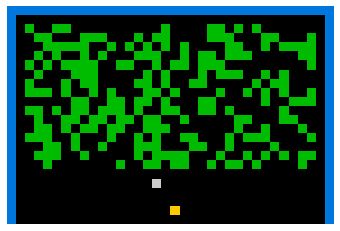

In [4]:
with open("inputs/day13.txt", 'r') as f:
    inputs = list(map(int, f.read().split(',')))
    
print("The game screen has {} block tiles".format(count_block_tiles(inputs)))
display_game(run_program([x for x in inputs], [])[0])

First paddle bounce


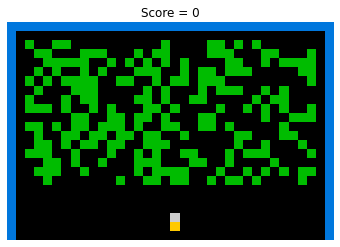

First block hit


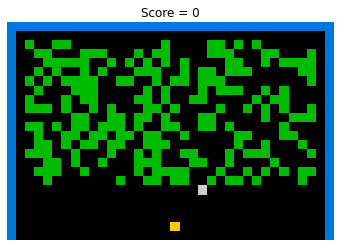

Score is updated


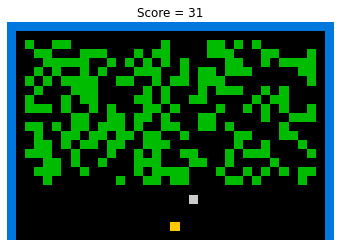

In [5]:
## let's try a few move
inputs[0] = 2
print("First paddle bounce")
display_game(run_program([x for x in inputs], [0, 0])[0])
print("First block hit")
display_game(run_program([x for x in inputs], [0, 0, 0, 0, 0 ])[0])
print("Score is updated")
display_game(run_program([x for x in inputs], [0, 0, 0, 0, 0, 0 ])[0])

199 blocks left [1.88s]


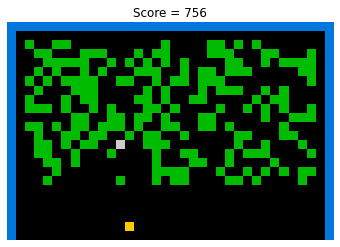

150 blocks left [10.78s]


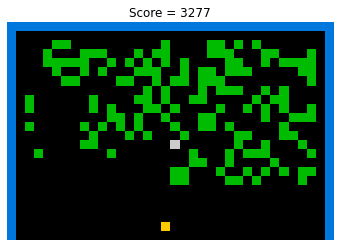

100 blocks left [18.97s]


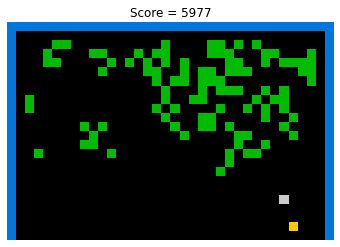

50 blocks left [29.76s]


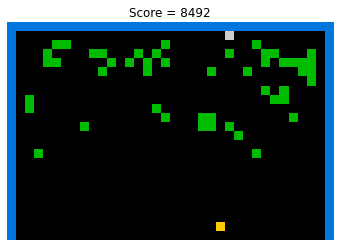

10 blocks left [84.64s]


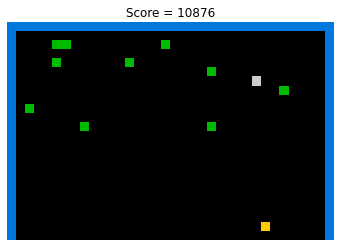

5 blocks left [102.02s]


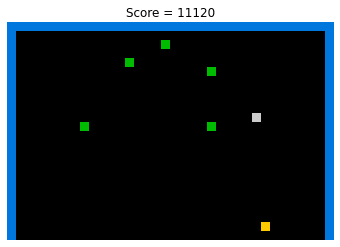

4 blocks left [113.13s]


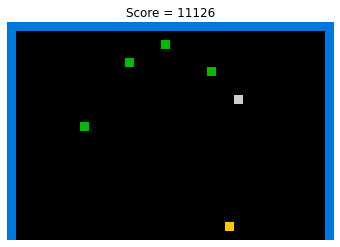

3 blocks left [125.72s]


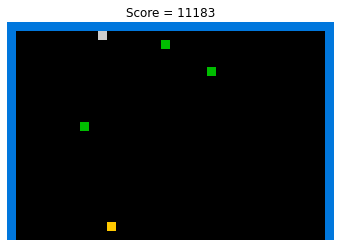

2 blocks left [141.65s]


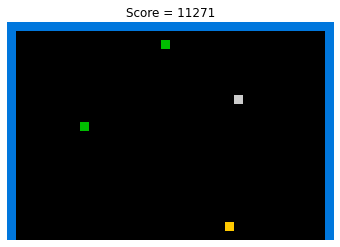

1 blocks left [157.47s]


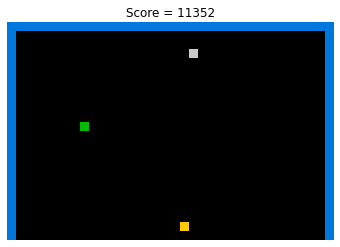

0 blocks left [172.68s]


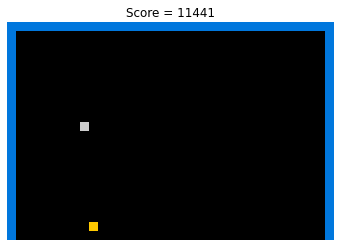

Final Score: 11441


In [6]:
# Play the game and display some keyframes + execution time
out = solve_game(inputs)